# Geometry

gdsfactory provides you with some geometric functions

## Boolean
There are several common boolean-type operations available in the geometry library.  These include typical boolean operations (and/or/not/xor), offsetting (expanding/shrinking polygons), outlining, and inverting.


The ``gf.boolean()`` function can perform AND/OR/NOT/XOR operations, and will return a new geometry with the result of that operation.

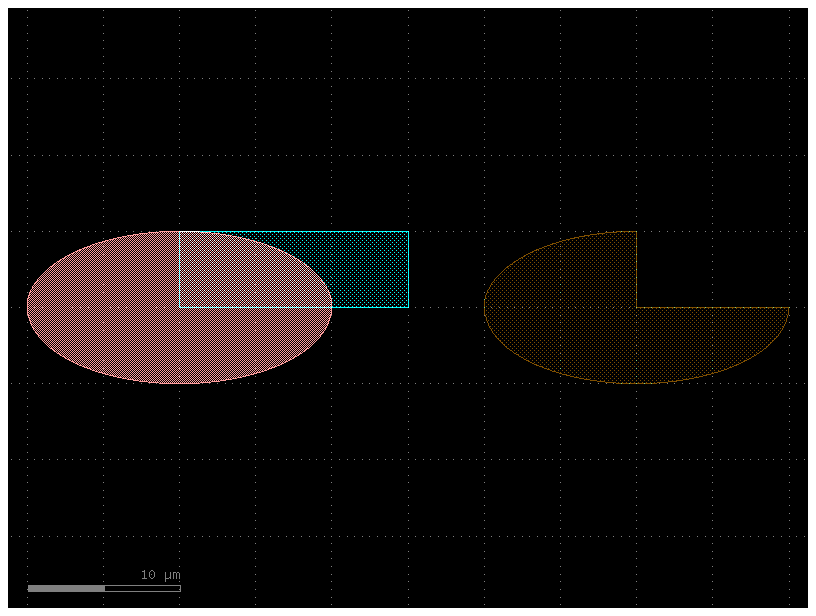

2025-03-27 13:18:12.962 | INFO     | kfactory.utils.fill:fill_tiled:285 - done with calculating fill regions for ToFill


In [1]:
import gdsfactory as gf

E = gf.components.ellipse(radii=(10, 5), layer=(1, 0))
R = gf.components.rectangle(size=(15, 5), layer=(2, 0))
C = gf.boolean(A=E, B=R, operation="not", layer1=(1, 0), layer2=(2, 0), layer=(3, 0))
# Other operations include 'and', 'or', 'xor', or equivalently 'A-B', 'B-A', 'A+B'

# Plot the originals and the result
D = gf.Component()
D.add_ref(E)
D.add_ref(R)
D.add_ref(C).dmovex(30)
D.plot()

To learn how booleans work you can try all the different operations `not`, `and`, `or`, `xor`

In [2]:
import gdsfactory as gf

operation = "not"
operation = "and"
operation = "or"
operation = "xor"

r1 = (8, 8)
r2 = (11, 4)
r1 = (80, 80)
r2 = (110, 40)

angle_resolution = 0.1

c1 = gf.components.ellipse(radii=r1, layer=(1, 0), angle_resolution=angle_resolution)
c2 = gf.components.ellipse(radii=r2, layer=(1, 0), angle_resolution=angle_resolution)

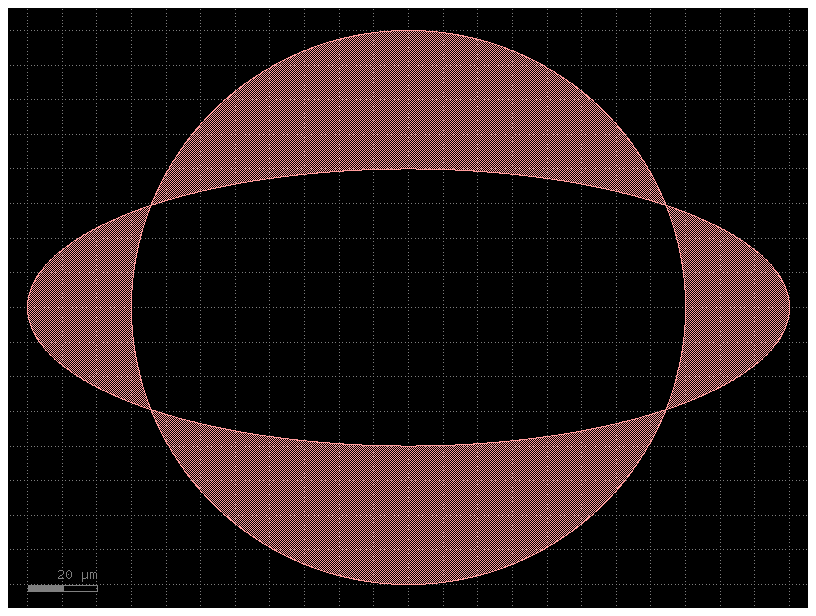

In [3]:
c4 = gf.boolean(c1, c2, operation=operation, layer=(1, 0))
c4.plot()

## Offset

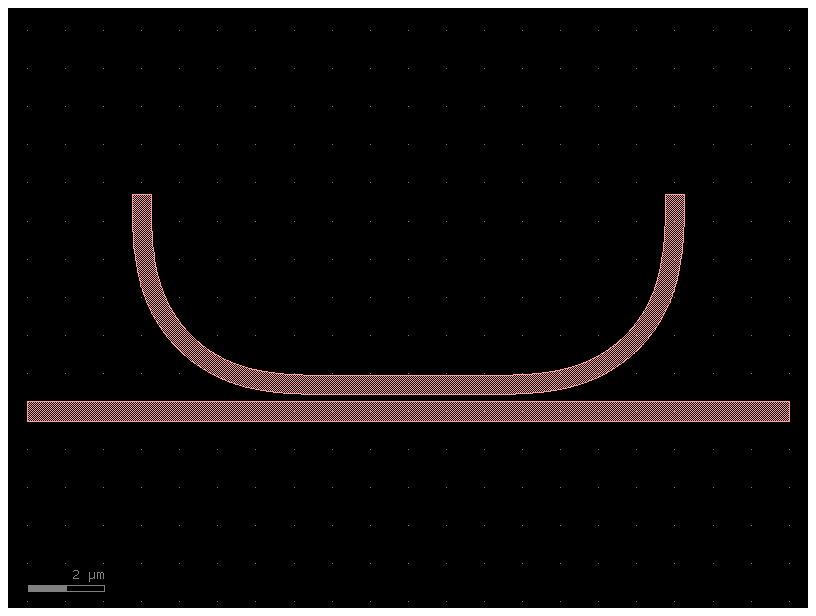

In [4]:
import gdsfactory as gf
from gdsfactory.generic_tech import LAYER

c = gf.components.coupler_ring()
c

In [5]:
polygons = c.get_polygons()[LAYER.WG]
polygons

[(-12000,-250;-12000,250;8000,250;8000,-250),
 (-4278,450;-4418,451;-4559,453;-4699,456;-4841,460;-4982,466;-5124,474;-5267,484;-5410,497;-5553,512;-5696,531;-5839,553;-5982,579;-6124,609;-6267,643;-6408,682;-6549,725;-6688,774;-6826,828;-6977,894;-7125,967;-7270,1047;-7411,1132;-7548,1224;-7681,1321;-7809,1425;-7933,1533;-8053,1647;-8167,1767;-8275,1891;-8379,2019;-8476,2152;-8568,2289;-8653,2430;-8733,2575;-8806,2723;-8872,2874;-8926,3012;-8975,3151;-9018,3292;-9057,3433;-9091,3576;-9121,3718;-9147,3861;-9169,4004;-9188,4147;-9203,4290;-9216,4433;-9226,4576;-9234,4718;-9240,4859;-9244,5001;-9247,5141;-9249,5282;-9250,5422;-9250,5700;-8750,5700;-8750,5424;-8749,5286;-8747,5149;-8744,5013;-8740,4877;-8735,4742;-8727,4607;-8718,4473;-8706,4340;-8691,4207;-8674,4075;-8654,3944;-8630,3814;-8603,3685;-8573,3558;-8538,3432;-8500,3308;-8457,3186;-8410,3066;-8352,2934;-8289,2806;-8220,2680;-8146,2558;-8066,2439;-7982,2324;-7892,2212;-7798,2104;-7699,2001;-7596,1902;-7488,1808;-7376,1718;-7261

In [6]:
r = gf.kdb.Region(polygons)
r

(-12000,-250;-12000,250;8000,250;8000,-250);(-4278,450;-4418,451;-4559,453;-4699,456;-4841,460;-4982,466;-5124,474;-5267,484;-5410,497;-5553,512;-5696,531;-5839,553;-5982,579;-6124,609;-6267,643;-6408,682;-6549,725;-6688,774;-6826,828;-6977,894;-7125,967;-7270,1047;-7411,1132;-7548,1224;-7681,1321;-7809,1425;-7933,1533;-8053,1647;-8167,1767;-8275,1891;-8379,2019;-8476,2152;-8568,2289;-8653,2430;-8733,2575;-8806,2723;-8872,2874;-8926,3012;-8975,3151;-9018,3292;-9057,3433;-9091,3576;-9121,3718;-9147,3861;-9169,4004;-9188,4147;-9203,4290;-9216,4433;-9226,4576;-9234,4718;-9240,4859;-9244,5001;-9247,5141;-9249,5282;-9250,5422;-9250,5700;-8750,5700;-8750,5424;-8749,5286;-8747,5149;-8744,5013;-8740,4877;-8735,4742;-8727,4607;-8718,4473;-8706,4340;-8691,4207;-8674,4075;-8654,3944;-8630,3814;-8603,3685;-8573,3558;-8538,3432;-8500,3308;-8457,3186;-8410,3066;-8352,2934;-8289,2806;-8220,2680;-8146,2558;-8066,2439;-7982,2324;-7892,2212;-7798,2104;-7699,2001;-7596,1902;-7488,1808;-7376,1718;-7261,16

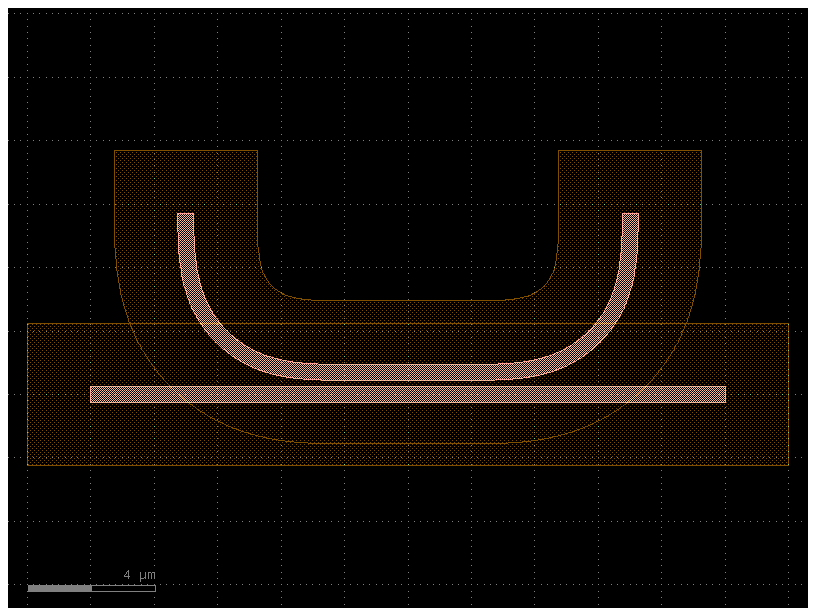

In [7]:
c2 = c.copy()
r = r.sized(2000)
c2.add_polygon(r, layer=LAYER.SLAB90)
c2

To avoid acute angles you can run over / under (dilation+erosion).

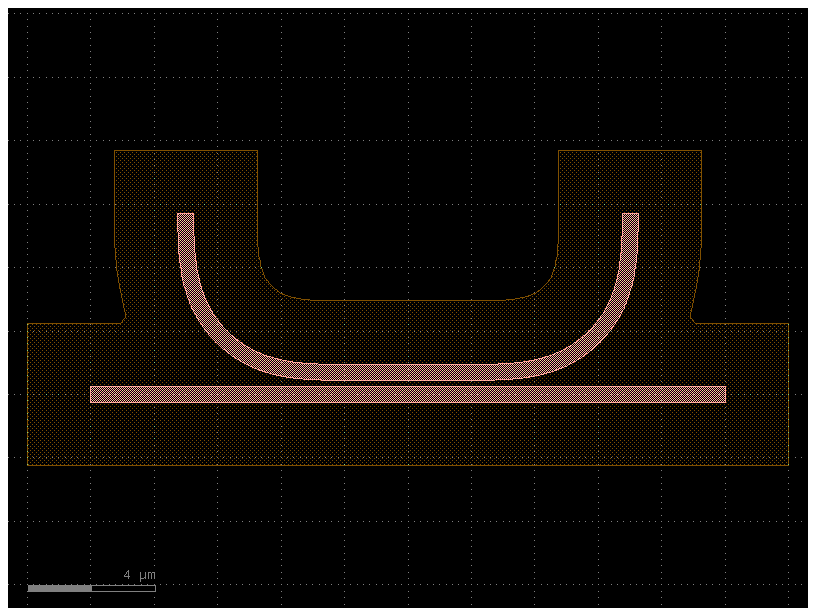

In [8]:
c2 = c.copy()

d = 800
r = gf.kdb.Region(polygons)
r = r.sized(+d + 2000)
r = r.sized(-d)
c2.add_polygon(r, layer=LAYER.SLAB90)
c2

## Outline

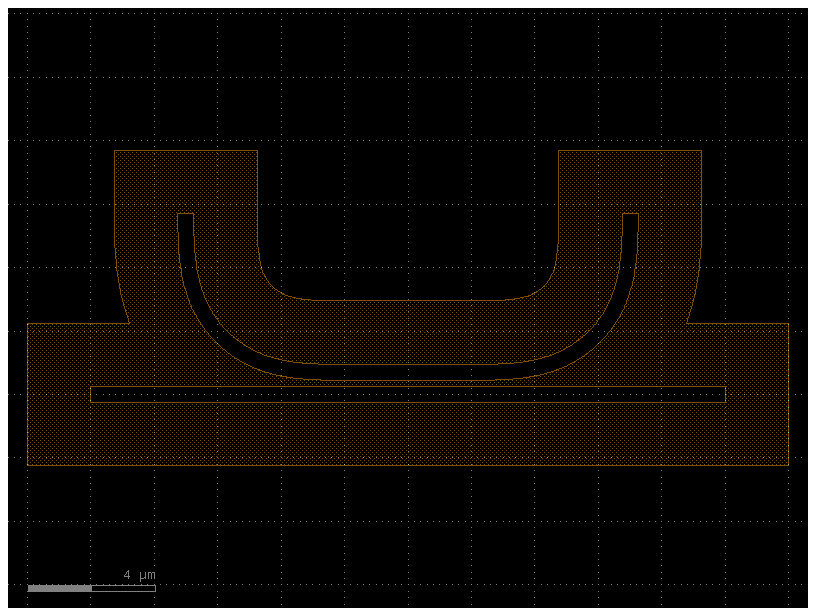

In [9]:
c2 = gf.Component()

d = 800
r = gf.kdb.Region(polygons)
r_sized = r.sized(+2000)

r_outline = r_sized - r
c2.add_polygon(r_outline, layer=LAYER.SLAB90)
c2

## Round corners

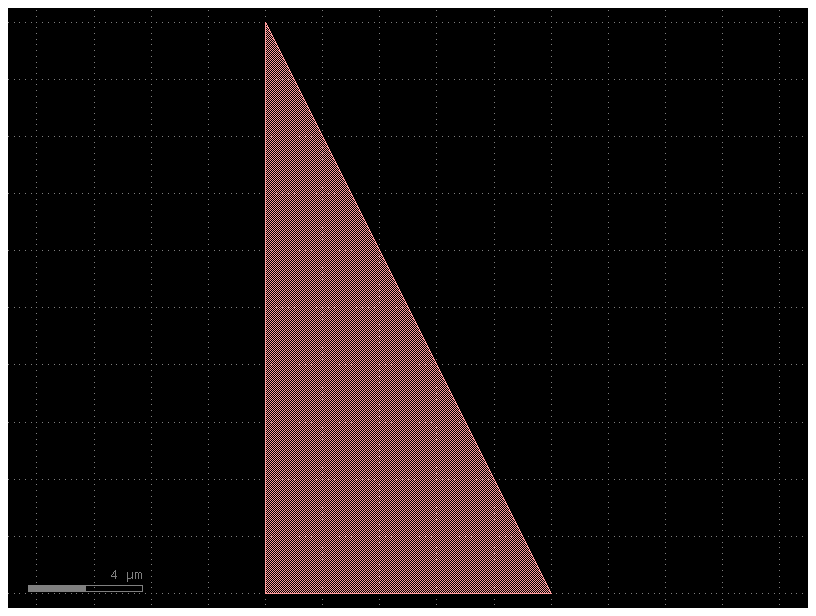

In [10]:
c = gf.c.triangle()
c

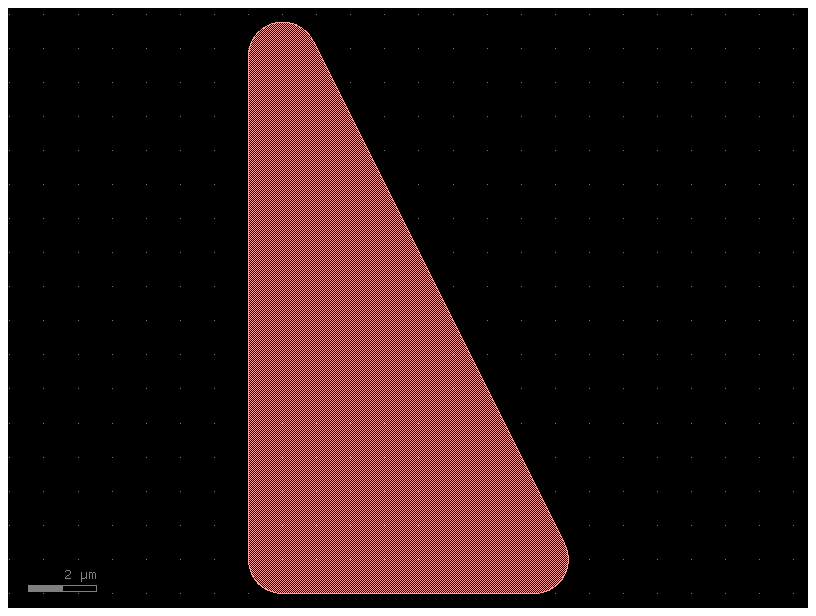

In [11]:
c2 = gf.Component()

rinner = 1000  # 	The circle radius of inner corners (in database units).
router = 1000  # 	The circle radius of outer corners (in database units).
n = 300  # 	The number of points per full circle.

# round corners for one layer only
for p in c.get_polygons()[LAYER.WG]:
    p_round = p.round_corners(rinner, router, n)
    c2.add_polygon(p_round, layer=LAYER.WG)

c2

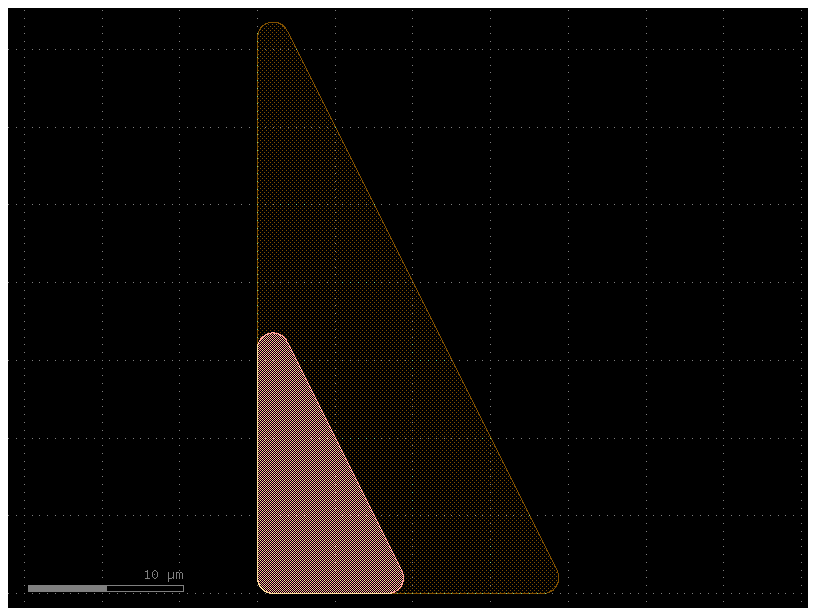

In [12]:
c = gf.Component()
t = c << gf.c.triangle(x=10, y=20, layer="WG")
t = c << gf.c.triangle(x=20, y=40, layer="SLAB90")

c2 = gf.Component()
rinner = 1000  # 	The circle radius of inner corners (in database units).
router = 1000  # 	The circle radius of outer corners (in database units).
n = 300  # 	The number of points per full circle.

# round corners for all layers
for layer, polygons in c.get_polygons().items():
    for p in polygons:
        p_round = p.round_corners(rinner, router, n)
        c2.add_polygon(p_round, layer=layer)

c2

## Union

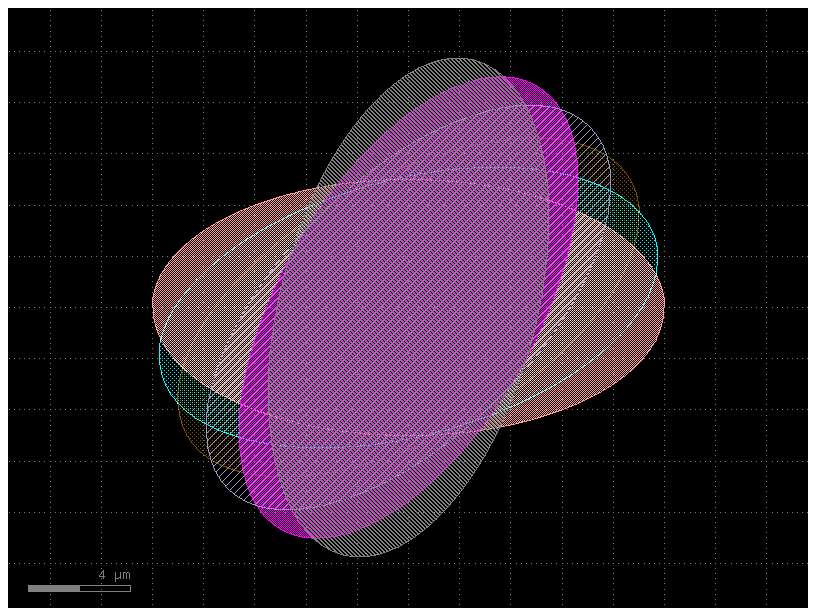

In [13]:
import gdsfactory as gf

c = gf.Component()
e0 = c << gf.components.ellipse(layer=(1, 0))
e1 = c << gf.components.ellipse(layer=(2, 0))
e2 = c << gf.components.ellipse(layer=(3, 0))
e3 = c << gf.components.ellipse(layer=(4, 0))
e4 = c << gf.components.ellipse(layer=(5, 0))
e5 = c << gf.components.ellipse(layer=(6, 0))

e1.drotate(15 * 1)
e2.drotate(15 * 2)
e3.drotate(15 * 3)
e4.drotate(15 * 4)
e5.drotate(15 * 5)

c

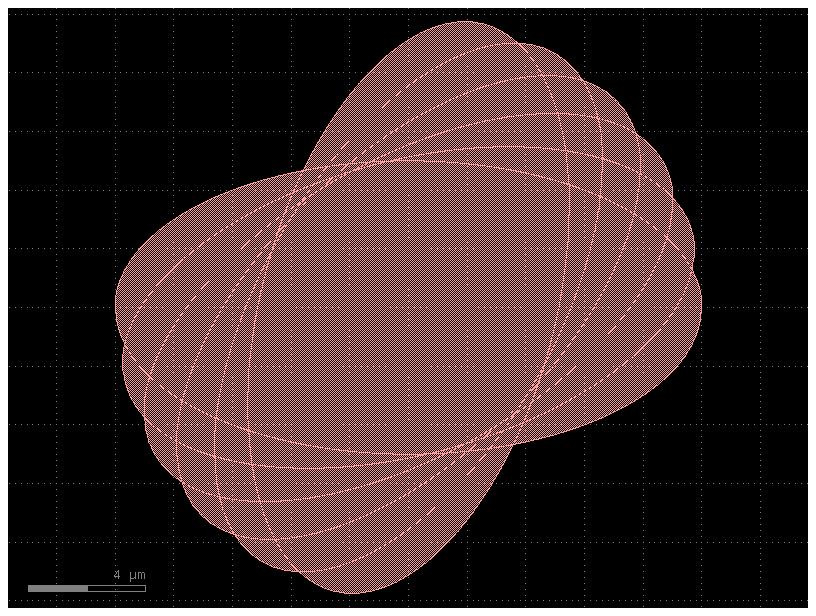

In [14]:
polygons = c.get_polygons()
r = gf.kdb.Region()

for polys in polygons.values():
    r = r + gf.kdb.Region(polys)

c2 = gf.Component()
c2.add_polygon(r, layer=(1, 0))
c2

## Importing GDS files

`gf.import_gds()` allows you to easily import external GDSII files.  It imports a single cell from the external GDS file and converts it into a gdsfactory component.

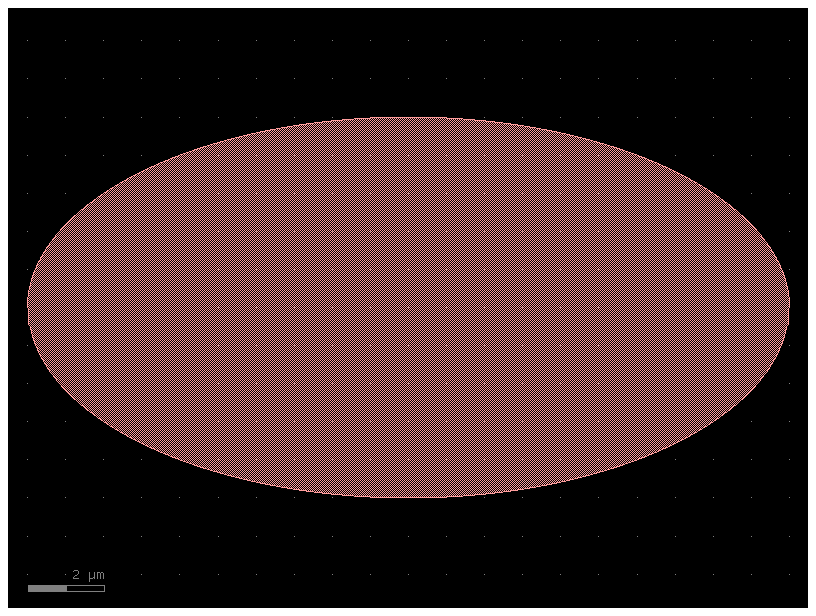

In [15]:
D = gf.components.ellipse()
D.write_gds("myoutput.gds")
D2 = gf.import_gds(gdspath="myoutput.gds")
D2.plot()

## Copying and extracting geometry

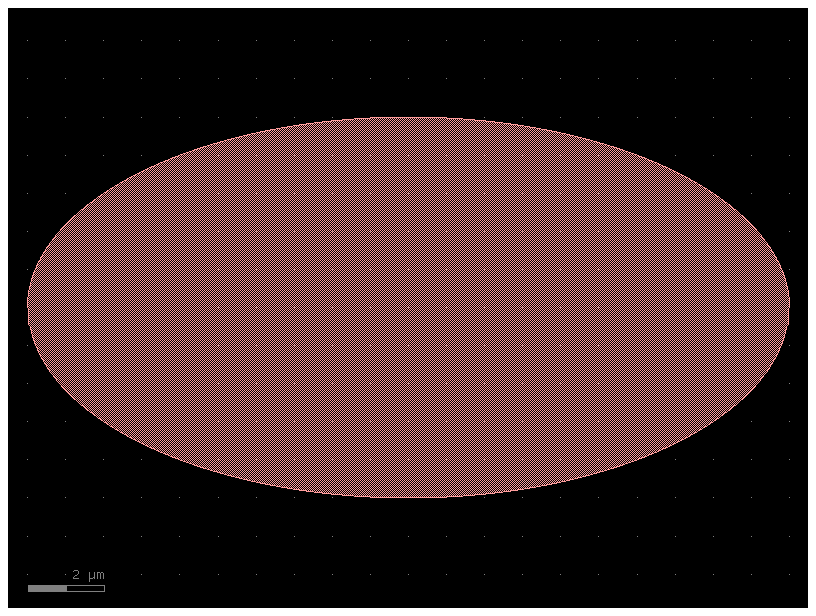

In [16]:
E = gf.Component()
E.add_ref(gf.components.ellipse(layer=(1, 0)))
D = E.extract(layers=[(1, 0)])
D.plot()

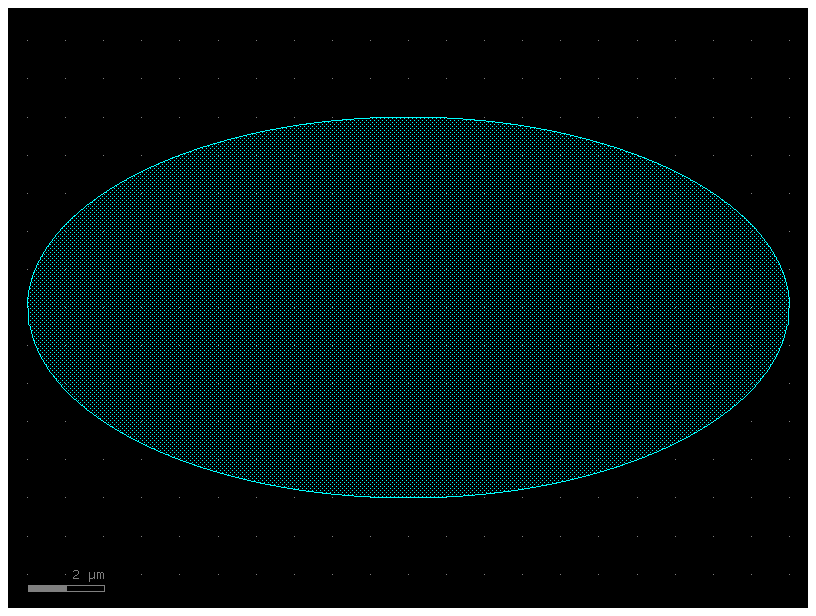

In [17]:
import gdsfactory as gf

X = gf.components.ellipse(layer=(2, 0))
c = X.copy()
c.plot()

## Import Images into GDS

You can import your logo into GDS using the conversion from numpy arrays.

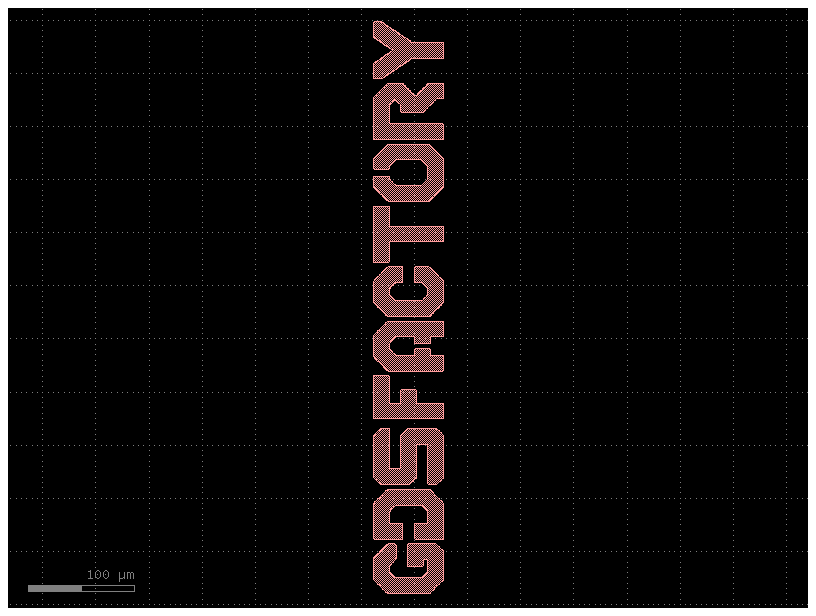

In [18]:
import gdsfactory as gf
from gdsfactory.config import PATH
from gdsfactory.read.from_np import from_image

c = from_image(
    PATH.module / "samples" / "images" / "logo.png", nm_per_pixel=500, invert=False
)
c.plot()

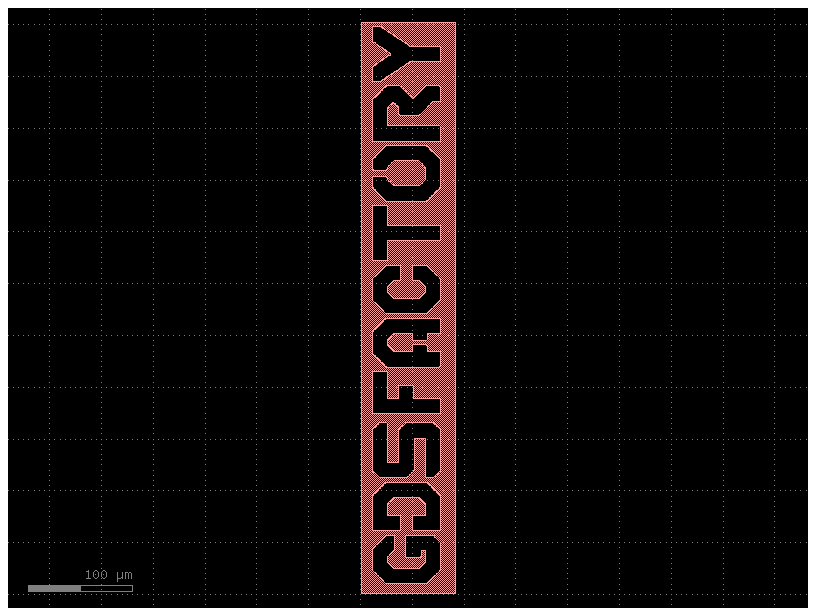

In [19]:
c = from_image(
    PATH.module / "samples" / "images" / "logo.png", nm_per_pixel=500, invert=True
)
c.plot()

## Dummy Fill / Tiling

To keep constant density in some layers you can add dummy fill shapes.

For big layouts you should use tiling processor.

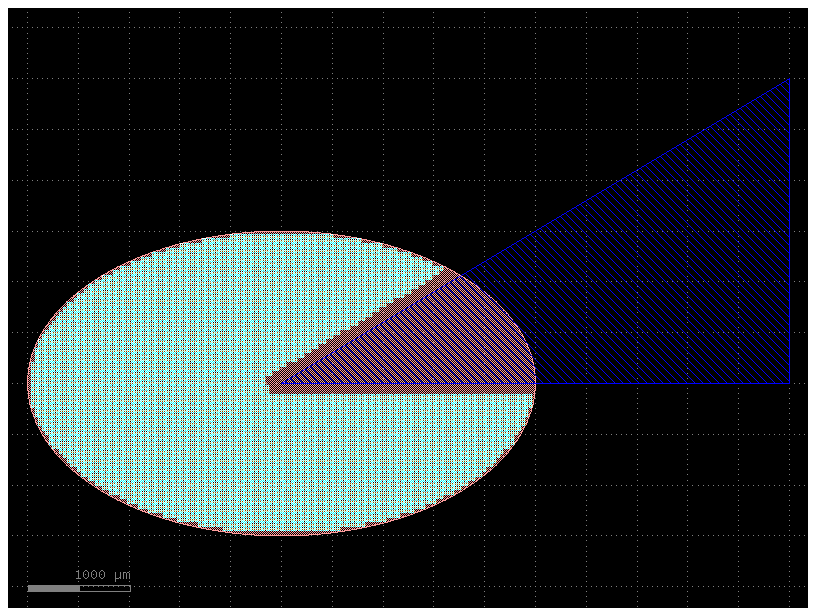

In [20]:
import kfactory as kf
from kfactory.utils.fill import fill_tiled

import gdsfactory as gf

c = kf.KCell("ToFill")
c.shapes(kf.kcl.layer(1, 0)).insert(
    kf.kdb.DPolygon.ellipse(kf.kdb.DBox(5000, 3000), 512)
)
c.shapes(kf.kcl.layer(10, 0)).insert(
    kf.kdb.DPolygon(
        [kf.kdb.DPoint(0, 0), kf.kdb.DPoint(5000, 0), kf.kdb.DPoint(5000, 3000)]
    )
)

fc = kf.KCell()
fc.shapes(fc.kcl.layer(2, 0)).insert(kf.kdb.DBox(20, 40))
fc.shapes(fc.kcl.layer(3, 0)).insert(kf.kdb.DBox(30, 15))

# fill.fill_tiled(c, fc, [(kf.kcl.layer(1,0), 0)], exclude_layers = [(kf.kcl.layer(10,0), 100), (kf.kcl.layer(2,0), 0), (kf.kcl.layer(3,0),0)], x_space=5, y_space=5)
fill_tiled(
    c,
    fc,
    [(kf.kdb.LayerInfo(1, 0), 0)],
    exclude_layers=[
        (kf.kdb.LayerInfo(10, 0), 100),
        (kf.kdb.LayerInfo(2, 0), 0),
        (kf.kdb.LayerInfo(3, 0), 0),
    ],
    x_space=5,
    y_space=5,
)

gdspath = "mzi_fill.gds"
c.write(gdspath)
c = gf.import_gds(gdspath, cellname="ToFill")
c.plot()